# Titanic dataset: To determine the survival of people

In [633]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [634]:
#Reading the csv file to get the data
titanic_ds = pd.read_csv('titanic_train.csv')
titanic_ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [635]:
# taking head of data
titanic_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [636]:
# Checking all the columns
titanic_ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [637]:
# Getting the datatypes of the various features
titanic_ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [638]:
# Dropping the non significant columns
titanic_ds.drop(['Name', 'PassengerId', 'Parch'], axis = 1, inplace=True)

In [639]:
# Checking the null values in a dataset
titanic_ds.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [640]:
#replacing null values of 'Age' with mean
titanic_ds['Age'].fillna(titanic_ds['Age'].mean(), inplace=True)

In [641]:
#replacing null values of 'Cabin' with mode
titanic_ds['Cabin'] = titanic_ds['Cabin'].fillna(titanic_ds['Cabin'].mode()[0])

In [642]:
#Checking again for null values
titanic_ds.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

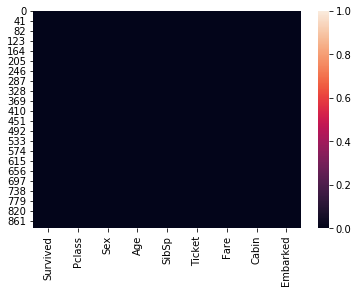

In [643]:
# null value visualization throgh heatmap
sns.heatmap(titanic_ds.isnull())

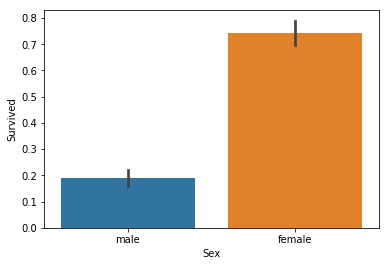

In [644]:
#Checking how many females and males are survived
sns.barplot(x='Sex', y='Survived', data=titanic_ds)
plt.show()

In [645]:
# Survival of People based on male and female
titanic_ds.groupby(['Sex'])['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [646]:
# Survival of People based Pclass
titanic_ds.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [647]:
# Survival of People based on sibSp: Sibling Spouse
titanic_ds.groupby(['SibSp'])['Survived'].sum()

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

In [648]:
# Survival of People based on Age
titanic_ds.groupby(['Age'])['Survived'].sum()

Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      5
2.00      3
3.00      5
4.00      7
5.00      4
6.00      2
7.00      1
8.00      2
9.00      2
10.00     0
11.00     1
12.00     1
13.00     2
14.00     3
14.50     0
15.00     4
16.00     6
17.00     6
18.00     9
19.00     9
20.00     3
20.50     0
21.00     5
22.00    11
23.00     5
         ..
44.00     3
45.00     5
45.50     0
46.00     0
47.00     1
48.00     6
49.00     4
50.00     5
51.00     2
52.00     3
53.00     1
54.00     3
55.00     1
55.50     0
56.00     2
57.00     0
58.00     3
59.00     0
60.00     2
61.00     0
62.00     2
63.00     2
64.00     0
65.00     0
66.00     0
70.00     0
70.50     0
71.00     0
74.00     0
80.00     1
Name: Survived, Length: 89, dtype: int64

In [649]:
#changing categorical variable to numbers 
from sklearn.preprocessing import LabelEncoder , StandardScaler
le = LabelEncoder()

In [650]:
arr = ['Sex', 'Ticket', 'Cabin', 'Embarked']
for var in arr:
    titanic_ds[var] = titanic_ds[var].astype(str)
    titanic_ds[var] = le.fit_transform(titanic_ds[var])
titanic_ds.head()

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,523,7.2500,47,2
1,1,1,0,38.0,1,596,71.2833,81,0
2,1,3,0,26.0,0,669,7.9250,47,2
3,1,1,0,35.0,1,49,53.1000,55,2
4,0,3,1,35.0,0,472,8.0500,47,2


In [651]:
titanic_ds.head()

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,523,7.2500,47,2
1,1,1,0,38.0,1,596,71.2833,81,0
2,1,3,0,26.0,0,669,7.9250,47,2
3,1,1,0,35.0,1,49,53.1000,55,2
4,0,3,1,35.0,0,472,8.0500,47,2


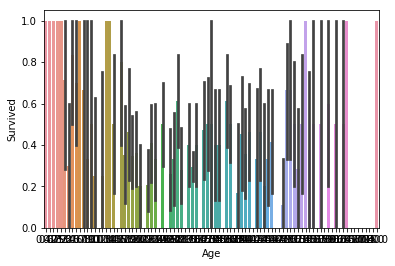

In [652]:
# Bivariet Analysis ..Checking relationship between Age and Survived
sns.barplot(x='Age', y='Survived', data=titanic_ds)
plt.show()

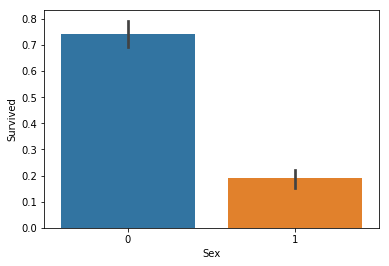

In [653]:
#Checking how many females and males are survived with br graph
sns.barplot(x='Sex', y='Survived', data=titanic_ds)

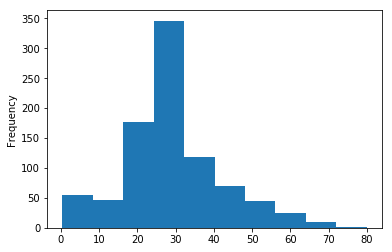

In [654]:
#Univariate analysis for age
titanic_ds['Age'].plot.hist()

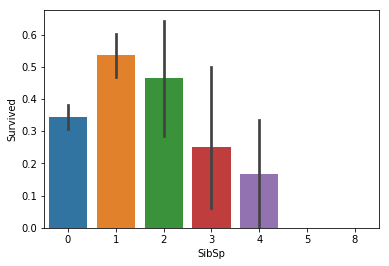

In [655]:
# Checking how many sibling spouse survived
sns.barplot(x='SibSp', y='Survived', data=titanic_ds)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


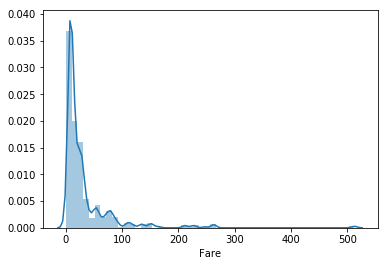

In [656]:
#Checking skewness thrugh distribution plot
sns.distplot(titanic_ds['Fare'])
plt.show()

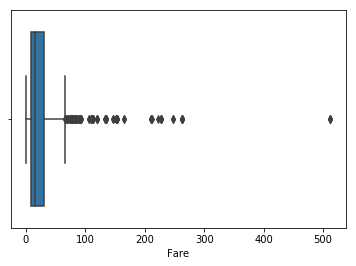

In [657]:
#Checking outliers for fare
sns.boxplot(titanic_ds['Fare'])
plt.show()

In [658]:
# Static computation
titanic_ds.describe()

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,338.528620,32.204208,53.639731,1.538721
std,0.486592,0.836071,0.477990,13.002015,1.102743,200.850657,49.693429,23.568293,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,337.000000,14.454200,47.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,519.500000,31.000000,47.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,680.000000,512.329200,146.000000,3.000000


In [659]:
#Checking the correlation of attributes
titanic_ds.corr()

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,-0.164549,0.257307,0.175690,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.319869,-0.549500,-0.248495,0.157112
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,0.059372,-0.182333,-0.102643,0.104057
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.068848,0.091566,0.056011,-0.022239
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.079461,0.159651,-0.005539,0.066654
Ticket,-0.164549,0.319869,0.059372,-0.068848,0.079461,1.000000,-0.013885,-0.072200,-0.006041
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,-0.013885,1.000000,0.090516,-0.221226
Cabin,0.175690,-0.248495,-0.102643,0.056011,-0.005539,-0.072200,0.090516,1.000000,0.019804
Embarked,-0.163517,0.157112,0.104057,-0.022239,0.066654,-0.006041,-0.221226,0.019804,1.000000


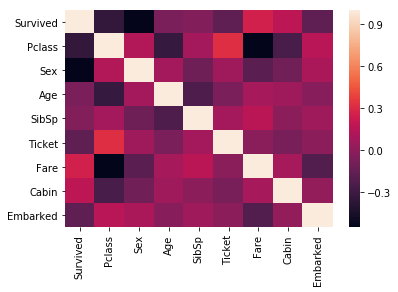

In [660]:
#Heatmap for correlation
sns.heatmap(titanic_ds.corr())
plt.show()

In [661]:
# Checking the skewness of data
titanic_ds.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Ticket      0.000246
Fare        4.787317
Cabin       2.268926
Embarked   -1.246689
dtype: float64

In [662]:
# removing skewness
for i in range(1,28):
    for col in titanic_ds.columns:
        if titanic_ds.skew().loc[col] > 0.55:
            titanic_ds[col] = np.log1p(titanic_ds[col])

In [663]:
titanic_ds.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       0.788487
Ticket      0.000246
Fare        0.394928
Cabin      -2.130144
Embarked   -1.246689
dtype: float64

In [664]:
titanic_ds.head()

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,0.071067,523,2.110213,3.871201,2
1,1,1,0,38.0,0.071067,596,4.280593,4.406719,0
2,1,3,0,26.0,0.000000,669,2.188856,3.871201,2
3,1,1,0,35.0,0.071067,49,3.990834,4.025352,2
4,0,3,1,35.0,0.000000,472,2.202765,3.871201,2


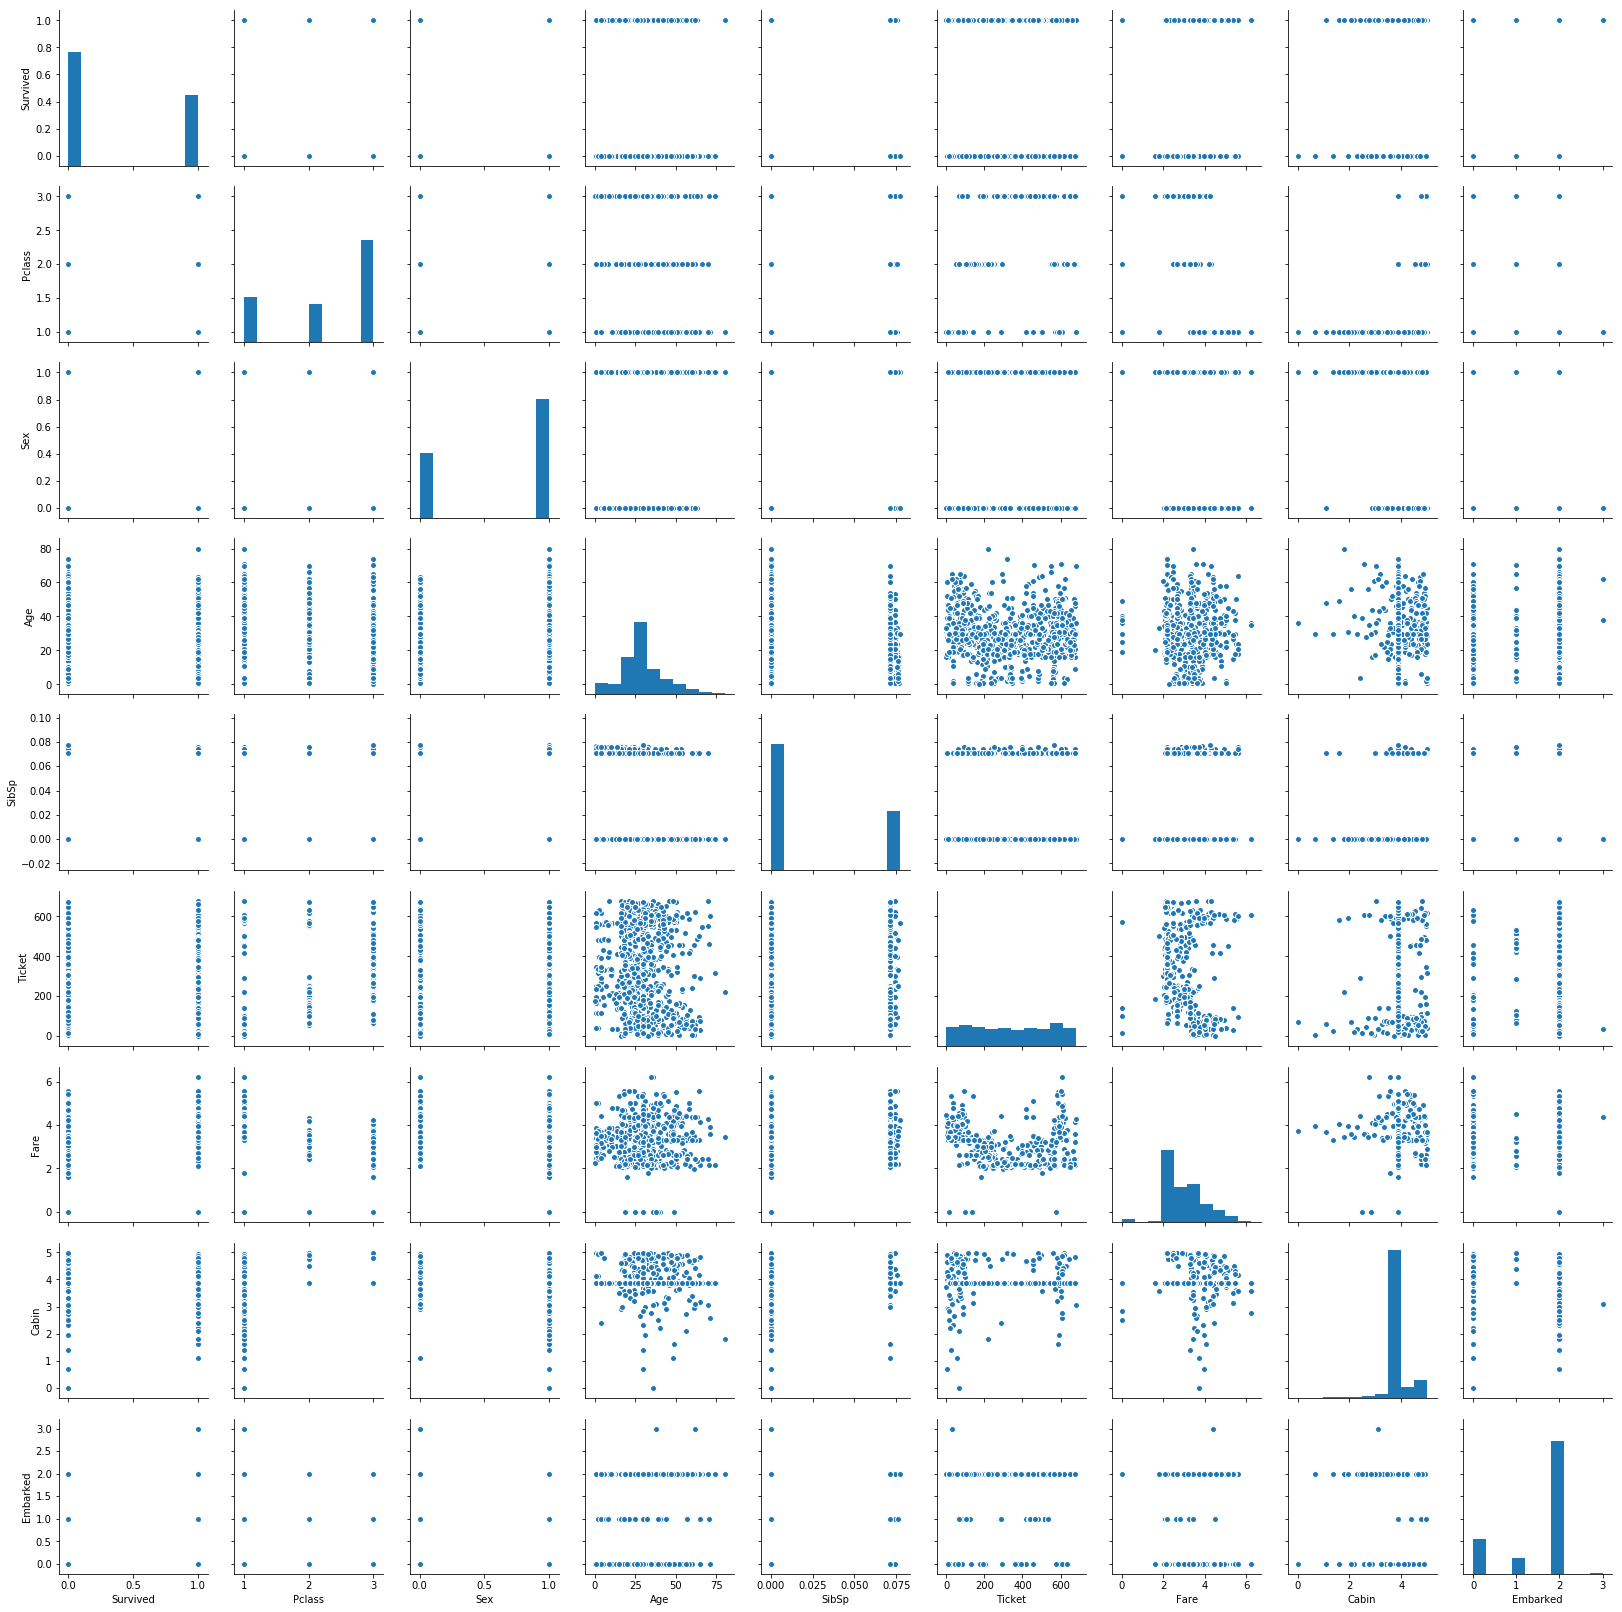

In [665]:
# Plotting pairplot for various features
sns.pairplot(titanic_ds)
plt.show()

In [666]:
# Checking the z scores and taking the appropriate values
from scipy.stats import zscore
z_score = abs(zscore(titanic_ds))
print ("\nBefore Removing outliers", titanic_ds.shape)

titanic_ds_final = titanic_ds.loc[(z_score < 3).all(axis=1)]
print ("\nAfter removing outliers", titanic_ds_final.shape)


Before Removing outliers (891, 9)

After removing outliers (855, 9)


In [667]:
# Checking for skewness
titanic_ds_final.skew()

Survived    0.464238
Pclass     -0.704673
Sex        -0.562209
Age         0.274581
SibSp       0.740213
Ticket     -0.004509
Fare        0.930736
Cabin       1.426861
Embarked   -1.261735
dtype: float64

In [668]:
titanic_ds_final.head()

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,0.071067,523,2.110213,3.871201,2
1,1,1,0,38.0,0.071067,596,4.280593,4.406719,0
2,1,3,0,26.0,0.000000,669,2.188856,3.871201,2
3,1,1,0,35.0,0.071067,49,3.990834,4.025352,2
4,0,3,1,35.0,0.000000,472,2.202765,3.871201,2


In [669]:
# Separatomg target and input variables

df_x = titanic_ds_final.drop(columns=['Survived'])
y = titanic_ds_final['Survived']

In [670]:
df_x.head()

,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,0.071067,523,2.110213,3.871201,2
1,1,0,38.0,0.071067,596,4.280593,4.406719,0
2,3,0,26.0,0.000000,669,2.188856,3.871201,2
3,1,0,35.0,0.071067,49,3.990834,4.025352,2
4,3,1,35.0,0.000000,472,2.202765,3.871201,2


In [671]:
# Scaling the input variables
# Liner Algorithm feature requires that all varibales should be on common scale


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns = df_x.columns)

In [672]:
x.skew()

Pclass     -0.704673
Sex        -0.562209
Age         0.274581
SibSp       0.740213
Ticket     -0.004509
Fare        0.930736
Cabin       1.426861
Embarked   -1.261735
dtype: float64

In [673]:
from sklearn.model_selection import train_test_split, cross_val_score

In [674]:
x_train.shape

(666, 8)

In [675]:
y_train.shape

(666,)

In [676]:
x_test.shape

(189, 8)

In [677]:
y_test.shape

(189,)

In [678]:
# LogisticRegression: Checking the best random state
from sklearn.linear_model import LogisticRegression

max_score = 0
for r_state in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size = .22)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    ypred = lr.predict(x_test)
    accu_scr = accuracy_score(y_test, ypred)
    if (accu_scr > max_score):
        max_score = accu_scr
        final_r_state = r_state

print ("\n Maximum score corresponding to state : ", final_r_state, " is ", max_score)
               


 Maximum score corresponding to state :  6  is  0.8624338624338624


In [679]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [680]:
# cross validation to remove the biasdness and variance
cross_val_scr = cross_val_score(LogisticRegression(), x, y, cv = 5, scoring='accuracy').mean()
print ("Cross val score: ", cross_val_scr)

Cross val score:  0.8012285501715987


In [681]:
# Computing based on the good random state
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=6, test_size=0.22)
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
cm = confusion_matrix(y_test, pred)

print ("\nAccuracy Score: ", accuracy_score(y_test, pred))
print ("\nClassification report: ", classification_report(y_test, pred))
print ("\nConfusion_Matris: \n", confusion_matrix(y_test, pred))


Accuracy Score:  0.8624338624338624

Classification report:               precision    recall  f1-score   support

          0       0.85      0.93      0.89       111
          1       0.88      0.77      0.82        78

avg / total       0.86      0.86      0.86       189


Confusion_Matris: 
 [[103   8]
 [ 18  60]]



ROC_AUC_SCORE :  0.8485793485793485

FPR, TPR, threshold:  [0.         0.07207207 1.        ] [0.         0.76923077 1.        ] [2 1 0]

AUC SCORE:  0.8485793485793485


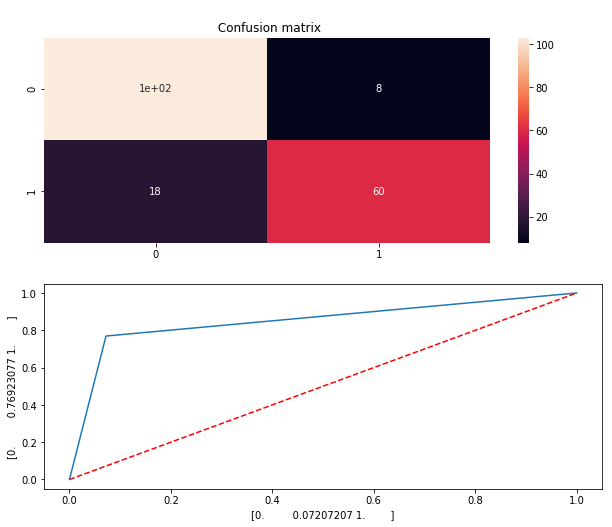

In [685]:
# AUC ROC CURVE
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, lr.predict(x_test))
print ("\nROC_AUC_SCORE : ", roc_auc_score)

fpr, tpr, threshold = roc_curve(y_test, pred)
print ("\nFPR, TPR, threshold: ", fpr, tpr, threshold)

auc_score = auc(fpr, tpr)
print ("\nAUC SCORE: ", auc_score)

plt.figure(figsize = (10, 40))
plt.subplot(911)
plt.title("\n Confusion matrix")
sns.heatmap(cm, annot=True)

plt.subplot(912)
plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr, tpr, Label='Logistic Regression')
plt.xlabel(fpr)
plt.ylabel(tpr)
plt.show()

In [683]:
from sklearn.externals import joblib
joblib.dump(lr, 'Titanic.pkl')
clf = joblib.load('Titanic.pkl')
clf.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)